##Cancelamento de cartão de crédito



#O problema

Um gerente está insatisfeito com a quantidade de clientes cancelando seus serviços de cartão de crédito. Para isso, ele contratou um cientista de dados que pudesse fazer o levantamento de hipoteses e descobrir por quais motivos os clientes vem cancelando esses cartões, além disso, saber quais clientes podem vir a cancelar os cartões.

#O Desafio

Faça uma analise dos dados e descubra quais são os clientes mais propensos a cancelar o cartão, além disso, crie graficos para dar embasamento as hipóteses.

#Base de Dados

Referencia diretamente do Kaggle: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [5]:
#Importação das bibliotecas e da base de dados
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BankChurners.csv", sep = ",")
df = df.drop(["CLIENTNUM",  "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)
#Tradução dos nomes das tabelas
df.columns = ['Categoria', 'Idade', 'Sexo', 'Dependentes', 'Educação', 'Estado Civil',	'Faixa Salarial Anual',	'Categoria Cartão',	'Meses como Cliente',	'Produtos Contratados',	'Inatividade 12m',	'Contatos 12m',	'Limite',	'Limite Consumido',	'Limite Disponível',	'Mudanças Transacoes_Q4_Q1',	'Valor Transacoes 12m',	'Qtde Transacoes 12m',	'Mudança Qtde Transações_Q4_Q1',	'Taxa de Utilização Cartão']
display(df)

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
#Tratamento de valores Nulos
df = df.dropna()
display(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Categoria                      10127 non-null  object 
 1   Idade                          10127 non-null  int64  
 2   Sexo                           10127 non-null  object 
 3   Dependentes                    10127 non-null  int64  
 4   Educação                       10127 non-null  object 
 5   Estado Civil                   10127 non-null  object 
 6   Faixa Salarial Anual           10127 non-null  object 
 7   Categoria Cartão               10127 non-null  object 
 8   Meses como Cliente             10127 non-null  int64  
 9   Produtos Contratados           10127 non-null  int64  
 10  Inatividade 12m                10127 non-null  int64  
 11  Contatos 12m                   10127 non-null  int64  
 12  Limite                         10127 non-null 

None

Existing Customer    8500
Attrited Customer    1627
Name: Categoria, dtype: int64

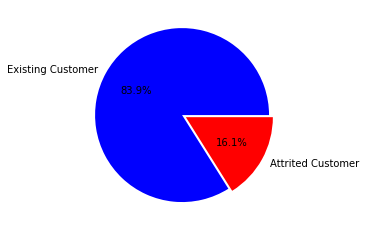

In [41]:
#Descobrir a porcentagem de pessoas que cancelaram os cartões
cat = df["Categoria"].value_counts()
ccat = df["Categoria Cartão"].value_counts()

display(cat)
#Exibindo um grafico da quantidade de pessoas que cancelaram os cartões
piechart = plt.pie(x = cat, labels = cat.keys(), autopct = "%.1f%%", explode = (0,0.05), colors = ['blue','red'])



Podemos notar, a partir daqui, que 16,1% das pessoas, com um total de 1627 pessoas cancelaram seus cartões com o banco, por isso, torna-se necessário avaliar as possiveis causas.

In [ ]:
#Fazer Tabelas comparando a categoria das pessoas que cancelaram o cartão e as que nao cancelaram